## SESSION06_군집화

### 1. 군집화(Clustering)

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 1-1. 비지도학습 </span>
- **데이터 자체에 내제된** 구조 파악, 학습
- 정답 레이블 X => 해야 하는 작업이 명확히 정의 X => **모델의 성능 명확히 측정 X!**
- 표햔 학습(or 피처 학습) => 데이터셋의 고유 패턴 식별     

> #### 비지도학습이 적합한 케이스   
1. 패턴이 알려지지 않은 경우 => 정답을 알 수 없음
2. 패턴이 변하는 경우 => 정답을 익혀도 큰 의미 X
3. 열린 문제를 해결하고 지식을 일반화해야 하는 경우   

ex) 고객 세그먼트 분삭, 이상 거래 탐지, 자연어 처리    

`목표 명확, 구체적, 좁은 범위: 지도학습 유리`     

|                 |  정답 여부  |  방식                        |  예시 |
|-----------------|----------|-----------------------------|------|
|     지도학습      | 정답 O     | 예측값을 정답과 같아지도록 기계 학습 | 회귀, 분류|
|    비지도학습      | 정답 X     | 페턴 또는 유사도를 기계가 학습     |군집화|

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 1-2. 군집화란? </span>
- 데이터를 비슷한 특성을 가진 그룹(군집)으로 나누는 비지도학습 기법   

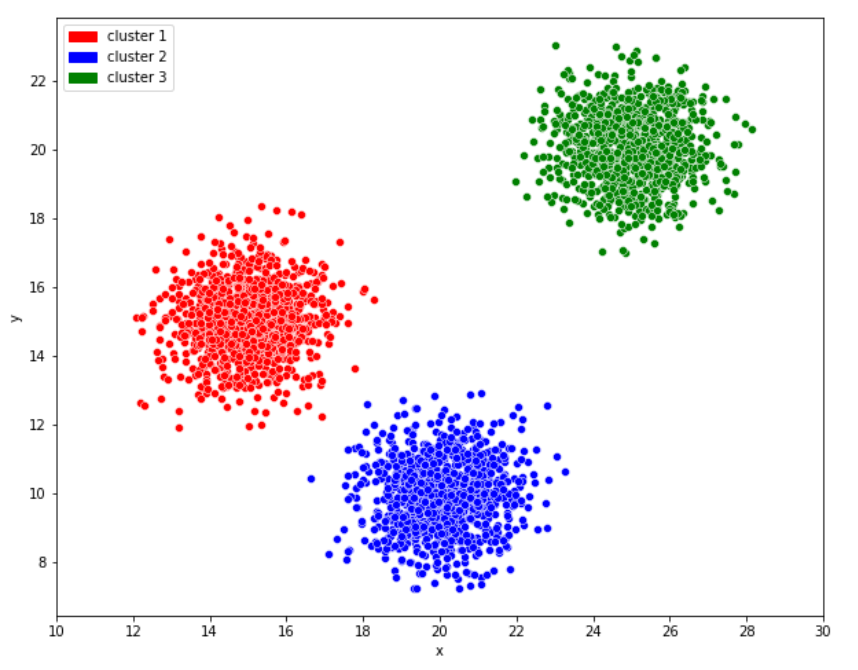   
> #### 군집화의 목표
1. 응집도(cohension) 최대화: 같은 군집에 속하는 데이터끼리 최대한 비슷
2. 분리도(separation) 최대화: 서로 다른 군집은 최대한 분리        

=> 데이터 간 유사성 최대한 잘 유지, 서로 다른 그룹은 구분         

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 1-3. 군집화 과정 </span>    

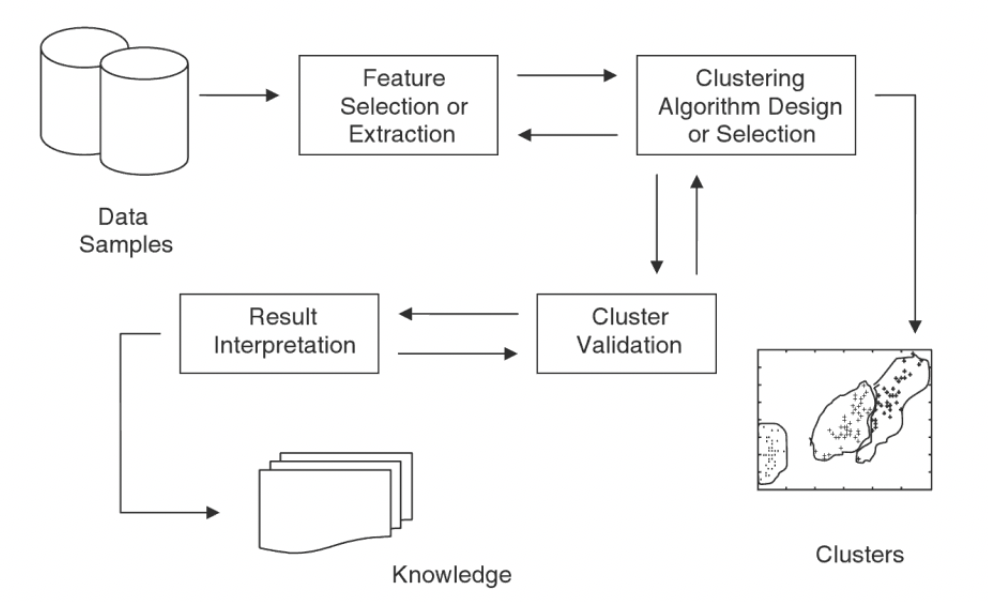     
1. 피처 선택 또는 추출
2. 군집화 알고리즘 선택
3. 군집 유효성 검증
4. 결과 해석 

### 2. 군집화를 위한 데이터 준비

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-1. 군집화의 주요 고려사항 </span>
❕ 군집화: 여러 번의 반복 시도 => 최적의 결과 => 주여 사항 고려 필요

1. 변수 유형 이해
- 연속형인지 명목형인지, 변수 개수에 따라 알고리즘이 달라짐
2. 거리 / 유사도 정의와 측정
- 군집화는 데이터 간의 거리 또는 유사도 기반
- 거리 측정 방법에 대한 정의 중요
3. 차원 축소
- 모델의 성능을 향상시키기 위해 유사한 변수들을 묶어 처리
- 변수가 많아질수록 모델 복잡, 효율성과 성능⬇️
- 유사한 변수 통합, 필요 없는 변수 제거 => 변수 개수⬇️

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-2. 변수 유형 이해 </span>
1. 연속형 변수 > 이번 세션에서 주로 다룸 
- 특징: 키, 몸무게, 나이, 소득 등 수치로 측정 가능
- 거리 측정: 유클리디안 거리, 맨하탄 거리 등 사용 가능
- 적합 알고리즘: K-means, 계층적 군집화...
- 주의사항: 스케일링 필수     
2. 명목형 변수
- 특징: 성별, 지역, 직업 등 번주로 구분
- 거리 측정: 해밍 거리, 자카드 거리 등
- 적합 알고리즘: K-modes, 계층적 군집화
- 처리 방법: 원-핫 인코딩, 더미 변수 변화
3. 혼합형 변수
- 특징: 연속형, 명목형 섞인 데이터
- 적합 알고리즘: K-prototymes, Gower distance 기반 계층적 군집화
- 처리 방법: 각 변수 유형에 맞는 거리 함수 조합 

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-3. 거리/유사도 정의와 측정 </span>
❕데이터 포인트나 군집 간의 유사성/비유사성 수치로 계산하는 방법, 거리가 가꺼울수록 유사 / 멀수록 다름    
1. 유클리디안 거리 (Euclidean Distance) > 이번 세선에서 사용      

$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$
- 가장 일반적
- 직선 거리
- K-means에서 기본적으로 사용    
2. 맨하탄 거리 (Manhattan Distance)     

$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^n |x_i - y_i|$
- 각 차원의 차이의 절댓값의 합
- 이상치에 덜 민감
3. 코사인 유사도 (Cosine Similarity)       

$\text{similarity} = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \times ||\mathbf{y}||}$
- 벡터 간의 각도 측정
- 텍스트 데이터나 고차원 데이터 효과적

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-4. 차원 축소 </span>
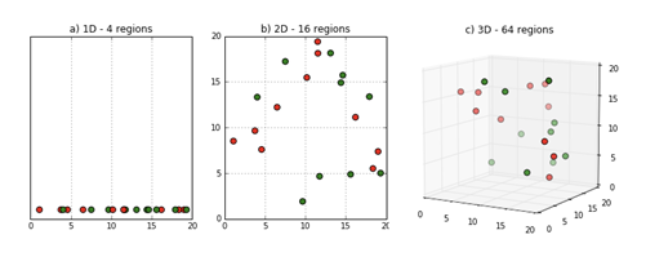    

⬆︎ 같은 양의 데이터 고차원으로 갈수록 데이터 밀도⬇️
- 군집화 알고리즘: 대부분 거리 기반 => 데이터 차원 높아질수록 차원의 저주....
> #### 차원의 저주?👿      
- 피처 공간이 너무 커서 알고리즘이 데이터를 효과적으로 훈련 X
- 고차원일수록 모든 점이 비슷하게 멀어짐 => 거리 기반 알고리즘 분별력⬇️      

=> 차원 축소가 필요하다!!! 

> #### 차원 축소    

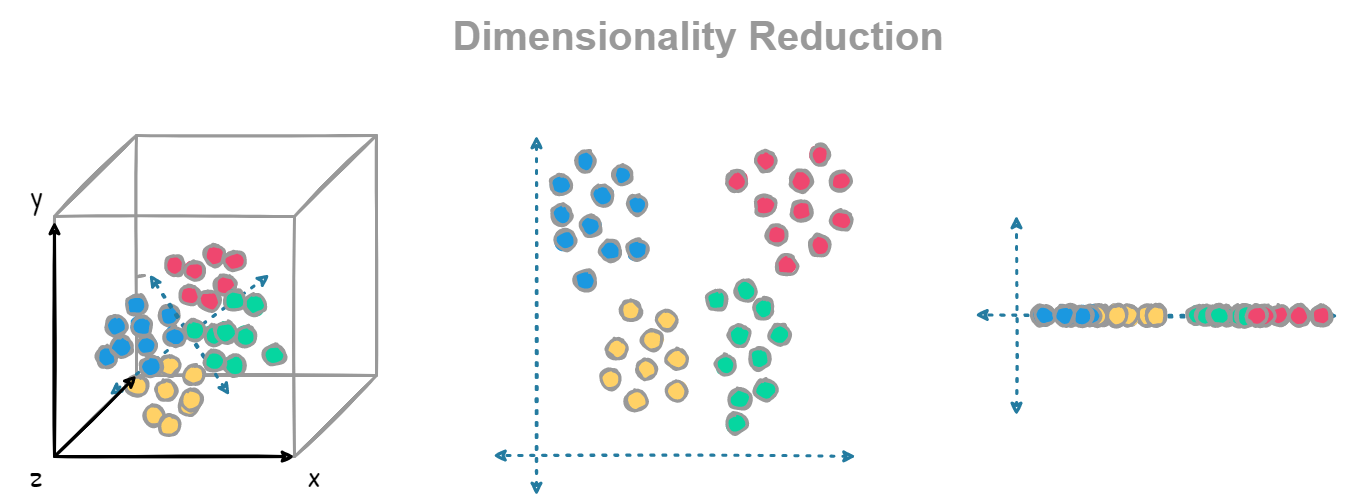   
- 차원: 변수의 개수 => 차원 축소: 변수의 개수 줄이기
- 차원 축소의 목표: 변수 제거, 차원⬇️, 고차원 데이터를 저차원 공간에 투영 but 핵심 정보는 지켜냄 => 노이즈를 줄여 패턴 학습에 유리!

1. 선형 투영: 고차원 -> 저차원 선형적으로 데이터 투영      

ex) 주성분 분석(PCA), 특이값 분해(SVD), 랜덤 투영 등      

2. 매니폴드 학습(비선형 차원 축소): 유클리드 거리가 아닌 데이터 포인트들 사이의 곡선 거리 고려 학습      

ex) t-SNE, UMAP, Isomap 등

> #### PCA (Principal Component Analysis)       
❕ 목적: 다차원 데이터에서 **가장 정보량(분산)이 큰 방향** 찾고, 그 방향을 기준으로 데이터 투영 => 차원 축소

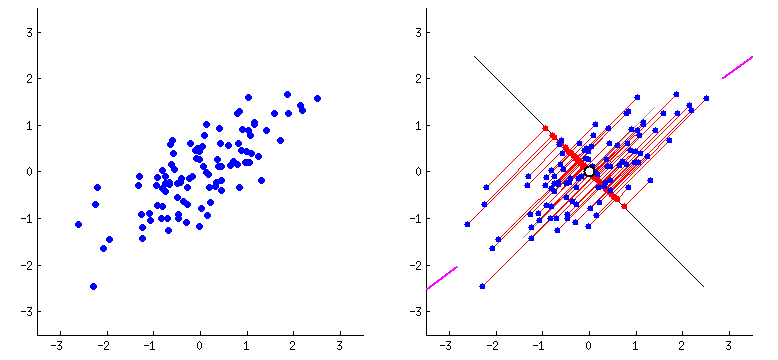        
- 데이터의 **분산 최대한 보존** => 시각화와 분석 용이
- 상관관계가 높은 피처들 결합 => 상관관계가 없는, 더 적은 수의 피처로 데이터 표현 지향
- **최대 분산 방향**을 찾아 상관관계 감소 => 저차원 공간에 투영 

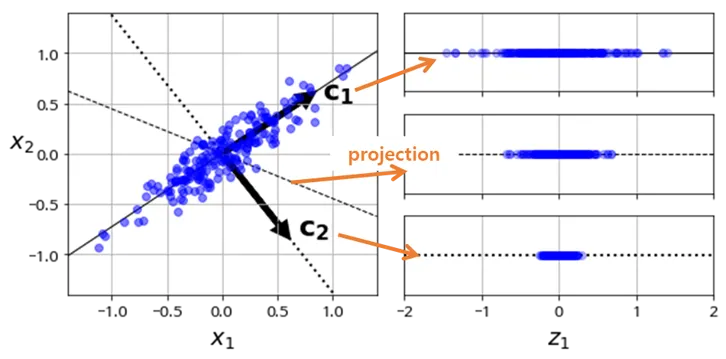     
⬆︎ C1 방향이 최대 분산 방향 

> #### PCA 사용하기 

### 3. 군집화 알고리즘

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-1. 계층적 군집화 (Hierarchical Clustering)  </span>
> #### 계층적 군집화의 특징
- 데이터셋의 관측치를 사용해 덴드로그램 만듦
- 군집의 개수 사전 성명 X, 클러스터링 종료 후 원하는 군집의 개수 선택
- 트리 구조를 **상향식** 구성: 응집형 계측적 군집화 또는 병합 클러스터링
- 트리 구조를 **하향식** 구성: 분리형 계층적 군집화 또는 분할 클러스터링
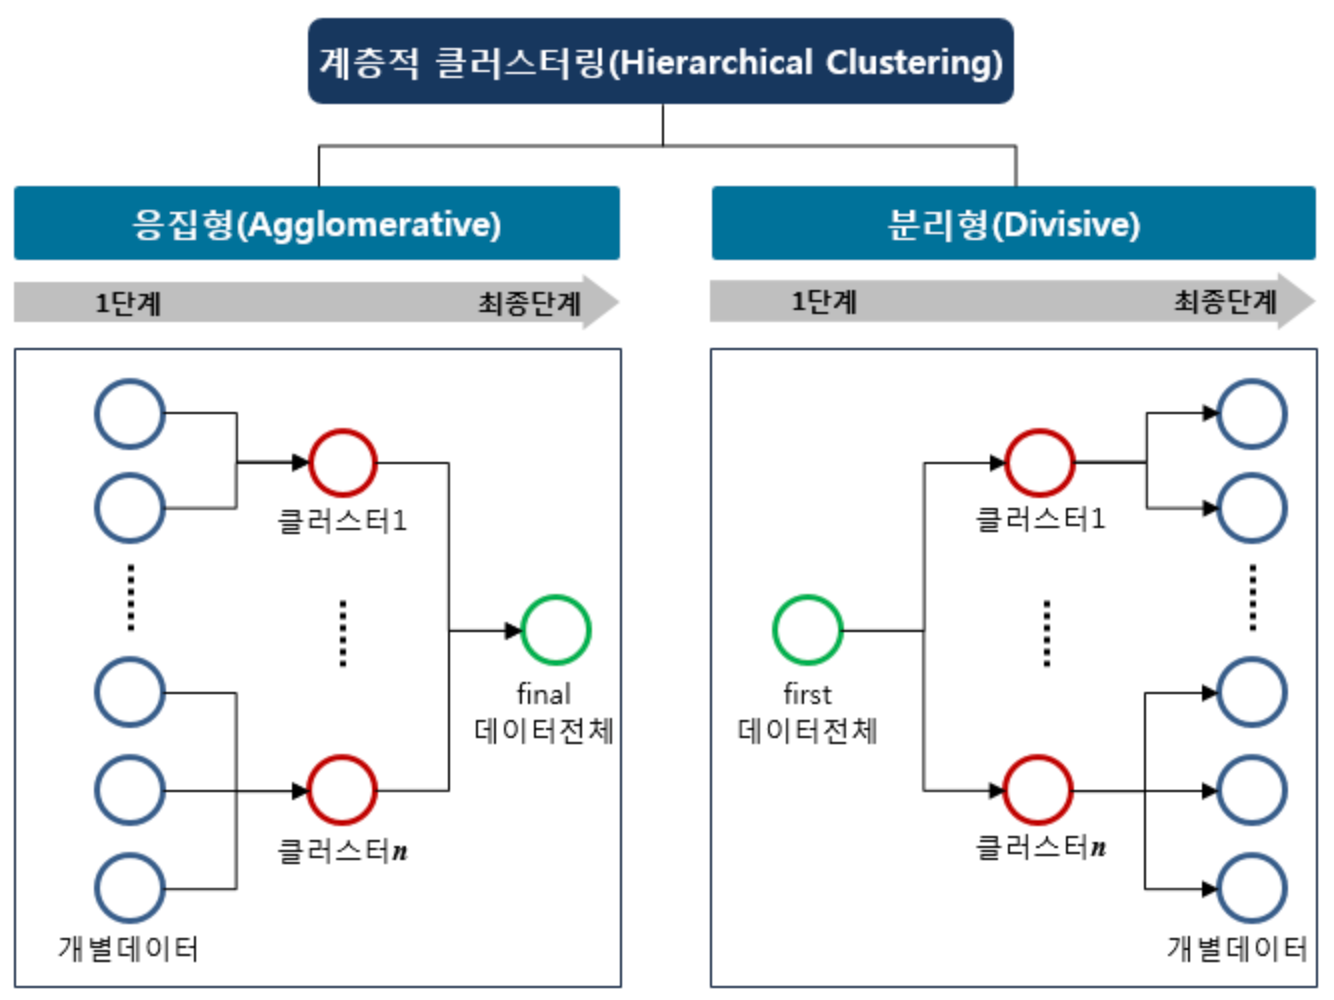

> #### 응집형 계층적 군집화
- 모든 데이터 포인트를 각각 하나의 클러스터로 간주
- 점차 가까운 클러스터들을 병합
- '가장 가까운 클러스터' 정의에 따라 다양할 알고리즘으로 나뉨
- **단일 연결**: 가장 가까운 두 샘플의 거리
- **완전 연결**: 가장 먼 두 샘플의 거리 

> #### 계층적 군집화 시각화
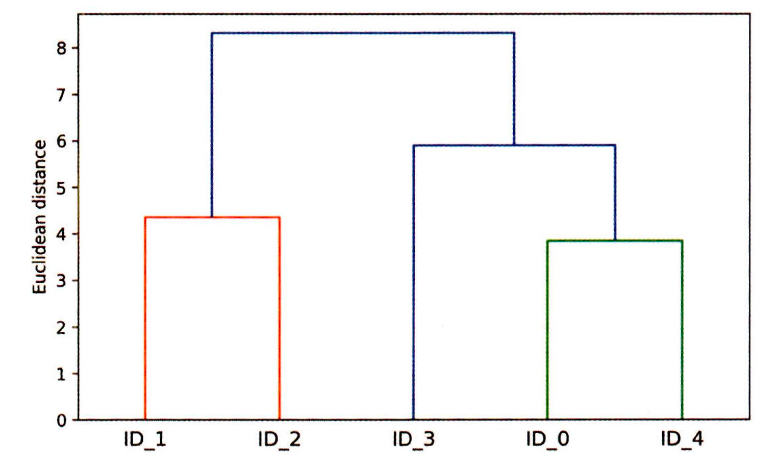
⬆︎ ID_0&ID_4, ID_1&ID_2: 유클리디안 거리 측정을 기반으로 했을 때 가장 가까운 샘플
- 계산량이 많기 때문에 소규묘 데이터 분석 or 전반적인 구조 분석 유용

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-2. k-means (Hierarchical Clustering)  </span>

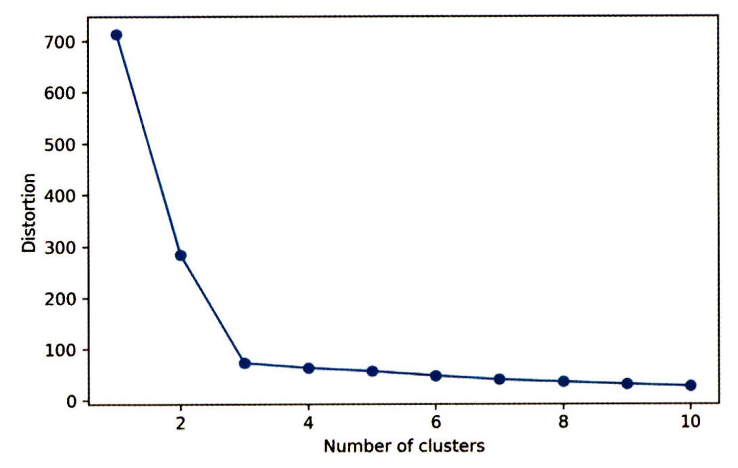     
- 군집화의 가장 일반적 알고리즘
- 연속적 데이터 샘플들 중 군집 중심점 선택 => 중심에 가까운 데이터들을 묶어나감
- 프로토타입 기반 군집화
> #### k-means의 주요 단계    

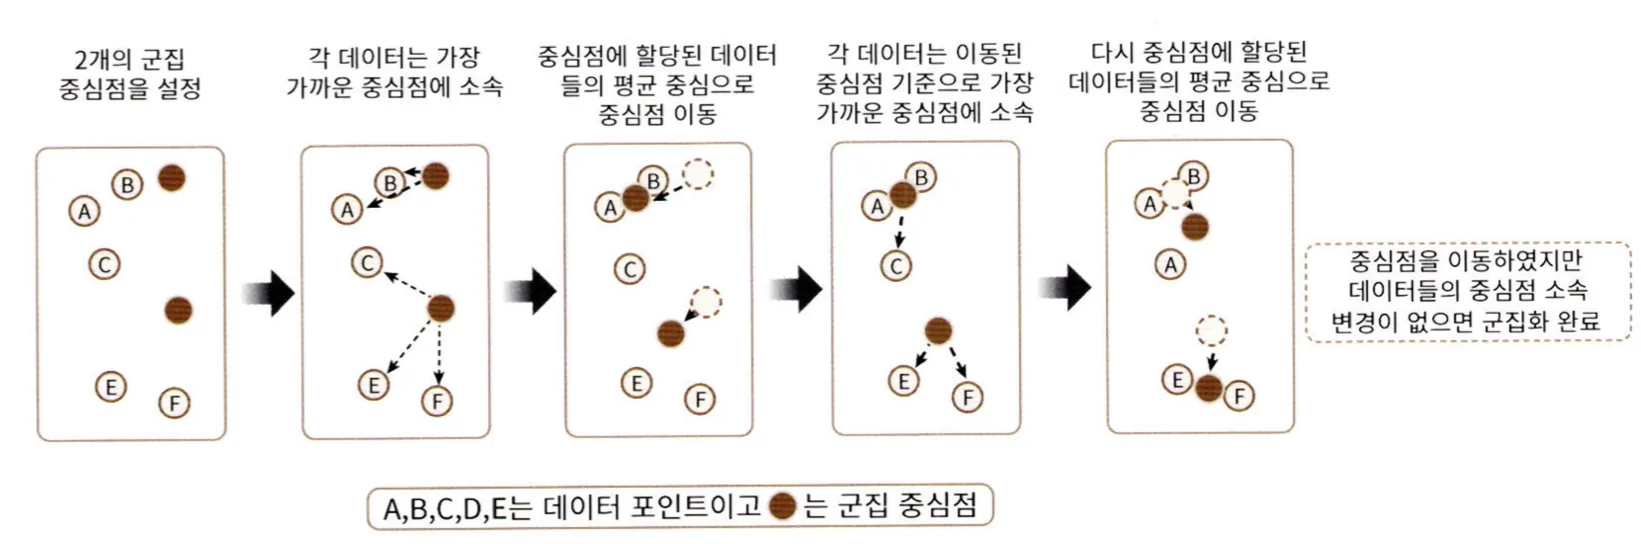
     
> #### k-means의 장단점
1. 장점 
- 직관적
- 구현 쉬움
- 대용량 데이터 적용 가능
2. 단점
- 초기 centroid 값에 민감
- 군집 수 (k) 결정 어려움
- 아웃라이어 민감
- 기하학적인 모양의 군집 파악 어려움 



> #### k-means++ 알고리즘    
- 초기 중심점들을 서로 멀리 떨어진 곳에 위치 => 일관되고 좋은 결과 도출

> #### k-means 알고리즘 초기화 과정
1.  선택한 $k$개의 중심점을 저장할 빈 집합 $\mathbf{M}$을 초기화
2. 입력 샘플에서 첫 번째 중심점 $\mathbf{\mu}^{(i)}$을 랜덤하게 선택 => $\mathbf{M}$에 할당
3. $\mathbf{M}$에 없는 각 샘플 $\mathbf{x}^{(i)}$에 대해 $\mathbf{M}$에 있는 중심점까지의 최소 제곱 거리 $d(\mathbf{x}^{(i)}, \mathbf{M})^2$을 찾음
4. 가중치가 적용된 확률 분포 =>  다음 중심점 $\mathbf{\mu}^{(p)}$을 랜덤하게 선택
    
    $$
    \frac{d(\mathbf{\mu}^{(p)}, \mathbf{M})^2}{\sum_i d(\mathbf{x}^{(i)}, \mathbf{M})^2}
    $$
    
        
5. $k$개의 중심점을 선택할 때까지 3, 4번을 반복
6. 기본 k-means 알고리즘을 수행

> #### 엘보우(elbow method)

- 클래스 내 SEE를 바탕으로 그래프 활용 => 최적 클러스터 개수 k 추정
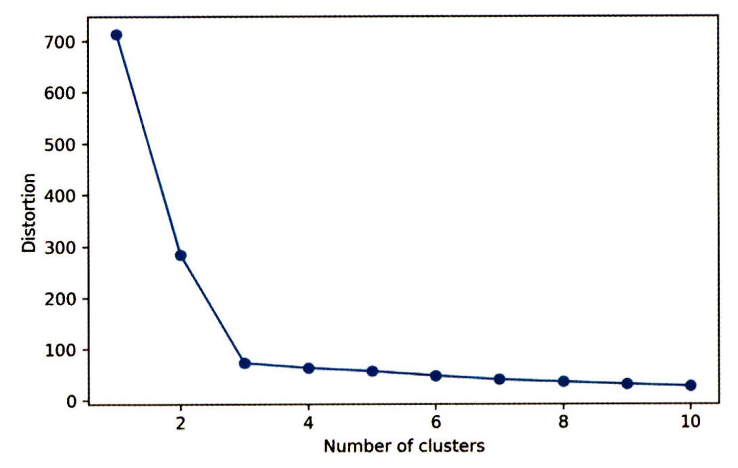

⬆︎ 급격히 기울기 변하는 지점 => 최적의 k 값 = 3
- 장점: 작관적, 구현이 간단
- 단점: 주관적 판단, 모호한 경우..

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-3. DBSCAN </span>
- 밀도가 높은 지역의 데이터를 하나의 군집으로 묶고, 밀도 기준 만족 X => 군집에 포함 X
- 명시적으로 이상치 지정 => 클러스터링에서 제외
- 이상치로부터 자유로움
- 어떤 데이터가 여러 군집의 특정 거리 내 => 가장 밀도가 높은 군집과 그룹화 

> #### DBSCAN 알고리즘 주요 단계
1. 샘플 분류
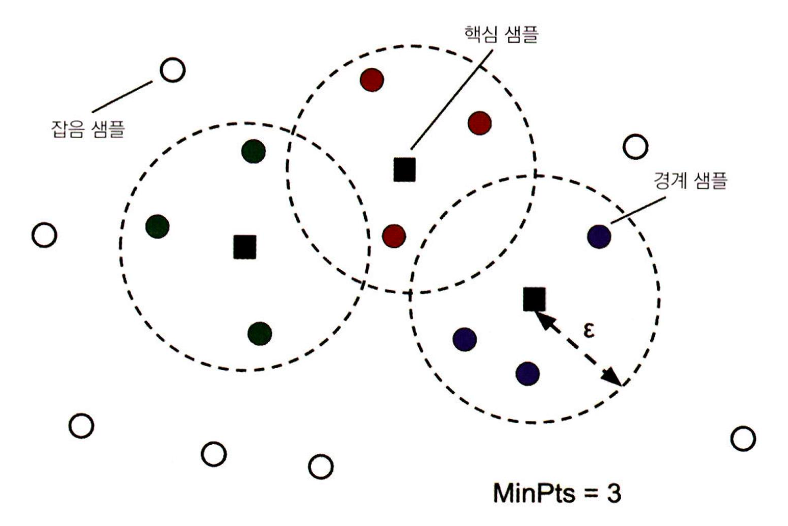
2. 클러스터 생성
3. 경계 샘플 할당

> #### DBSCAN 장단점 
1. 장점: 클러스터 모양을 원향으로 가정 X, 밀도에 따라 클러스터 할당, 이상치에 민감 X, 모든 샘플을 클러스터에 할당 X
2. 단점: epsilon과 min_samples 설정에 많은 영향, epsilon 조작 ㅅ어려움, 연산량 많 => 속도⬇️, 다른 밀도 분포를 가진 데이터의 군집 분석 잘 못 , 차원의 저주 영향

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-4. Gaussian Mixture Model (GMM)
- 데이터가 여러 다른 모양의 가우시안 분포로 구성되어있다고 가정 => 각 분포를 클러스터로 인식 

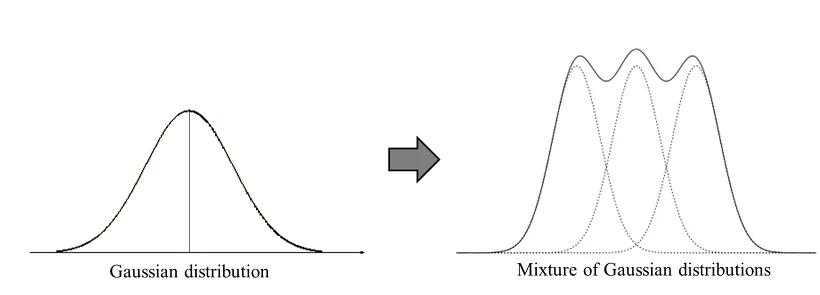
⬆︎ 단일 분포로 표현하기 어려운 복잡한 형태의 확률 븐포 => 여러 개의 가우시안 분포 합쳐서 표현 

> #### GMM의 특징
- 모델 기반 군집화 방법
- 각 군집을 확률 분포로 간주
- 전체 데이터 분포 => 여러 확률 분포의 혼합으로 모델링
- 데이터의 생성 메커니즘까지 모델링 가능

> #### GMM의 가정
- 관측된 데이터: 특정 가우시안 확률 분포에 의해 생성
- 전체 데이터셋: 여러 개의 다변량 가우시안 분포 섞임
- 개별 데이터: 우도에 따라 K개의 가우시안 분포 중 하나에 속함 

> #### GMM의 진행 과정
1. 전체 데이터셋의 분포 롹인
2. 서로 다른 정규 분포 형태의 확률 분포 곡선으로 구성되어 있다고 가정
3. 여러 개의 정규분포 곡선 추출, 개별 데이터가 어떤 정규분포에 속하는지 결정 => 각각의 분표 = 하나의 군집

> #### GMM의 장단점
1. 장점: 유연하게 다양한 데이터 세트에 적용, 타원형 분포나 중첩된 군집 구조에서도 좋은 성능
2. 단점: 수행시간 오래 걸림, 가정한 분포에 맞지 않은 데이터일 경우 계산 복잡도⬆️, 성능⬇️

### 4. 군집화 평가 방법

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-1. 외부 평가 (External Evaluation)</span>
- 데이터에 정답 레이블 존재
- 군집화 결과와 실제 레이블 비교 => 얼마나 유사한지 평가
- 대표 지표: ARI (Adjusted Rand Index)

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-2. 내부 평가 (Internal Evaluation) </span>
- 정답 레이블이 없는 경우
- 군집 내 응집도와 군집 간 분리도 기반 => 데이터 자체의 구조 기반 군집 품질 판단
- 알고리즘 별 내부 평가 지표: K-means 알고리즘 - SSE 최소화, GMM: 로그 우드 최대화
- 대표적 범용적 지표: 실루엣 계수, 던 지수

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-3. 실루엣 개수 </span>
- 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지 측정 => 군집의 품질 확인 
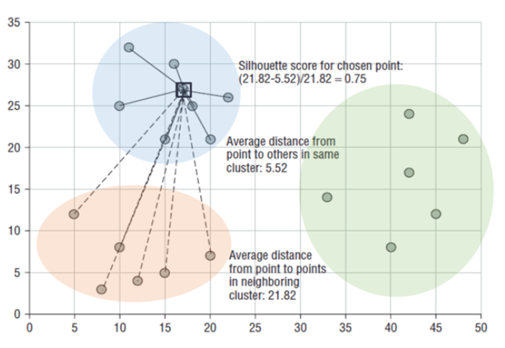

> #### 실루엣 계수 계산

$s^{(i)} = \frac{b^{(i)} - a^{(i)}}{\max \left\{ b^{(i)}, a^{(i)} \right\}}$

1. 샘플$\mathbf{x}^{(i)}$ 동일한 클러스터 내 모든 다른 포인터 사이의 거리 평균 => 클러스터 응집력$\mathbf{a}^{(i)}$ 계산
2. 샘플$\mathbf{x}^{(i)}$과 가장 가까운 클러스터의 모든 샘플간 평균 거리 => 최근접 클러스터의 클러스터 분리도$\mathbf{b}^{(i)}$ 계산
3. 클러스터 응집력과 분리도 사이 차이를 둘 중 큰 값으로 나눔 => 실루엣$\mathbf{s}^{(i)}$ 계산

> #### 실루엣 계수 해석
- -1~1 사이 값
- 분리도 > 응집도: 이상적인 실루엣 계수인 1에 가까워짐 => 군집화 잘 됨
- 분리도 = 응집도: 실루엣 계수 0
- 분리도 < 응집도: 실루엣 계수는 -2에 가까워짐 => 군집화 잘 안 됨


##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4-4. Dunn Index </span>
$
\text{Dunn Index} = \frac{
\min\limits_{i \ne j} \; d(C_i, C_j)}{\max\limits_{1 \le k \le K} \; \delta(C_k)}$
- $d(C_i, C_j)$ : 클러스터 $C_i$와 $C_j$ 사이의 거리(분리도)
- $\delta(C_k)$ : 클러스터 $C_k$ 내의 최대 거리(응집도)

> #### Dunn Index 해석 

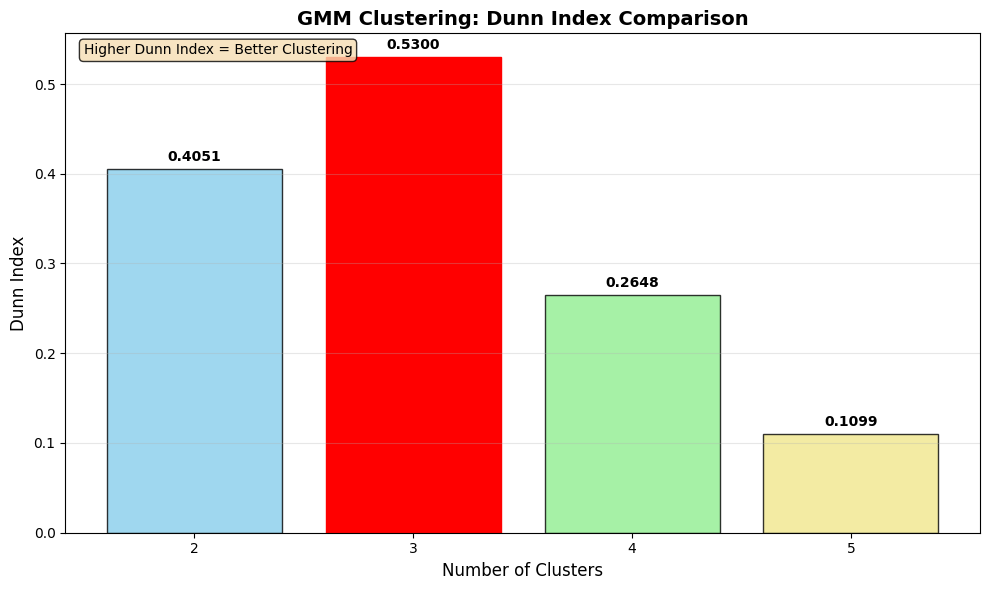 
- 던 지수 클수록 좋은 군집화
- 일반적으로 0 이상, 무한대까지 가능

> #### Dumm Index 한계
- 군집 수 많아질수록 계산 비용 증가
- 극단적인 값에 큰 영향
- 이상치에 민감하게 반응 => 수치 급감할 수 있음

